In [1]:
import zipfile
import os

zip_path = 'athlete_events.csv.zip'
extract_to = 'unzipped_athlete_data'

# Create folder and extract
os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Zip file extracted!")


✅ Zip file extracted!


In [2]:
extracted_files = os.listdir(extract_to)
print("Extracted files:", extracted_files)


Extracted files: ['athlete_events.csv']


In [3]:
import pandas as pd

csv_path = os.path.join(extract_to, 'athlete_events.csv')
df_athlete = pd.read_csv(csv_path)

# Show first few rows
df_athlete.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:

print("Columns:", df_athlete.columns.tolist())
df_athlete.describe()


Columns: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df_noc = pd.read_csv("noc_regions.csv")
df_noc.head()
df_noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [6]:
!pip install pandasql

In [7]:
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

In [8]:
pysql("SELECT *  From df_athlete limit 10")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [9]:
pysql("Select * from df_noc")

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None
...,...,...,...
225,YEM,Yemen,None
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,None


In [10]:
pysql("SELECT Team, COUNT(Medal) AS Total_Medals_in_120_Y FROM df_athlete WHERE Medal IS NOT NULL GROUP BY Team ORDER BY Total_Medals_in_120_Y DESC")

,Team,Total_Medals_in_120_Y
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
...,...,...
493,Brynhild-2,1
494,Botswana,1
495,Bonaparte,1
496,Bermuda,1


In [11]:
query = """
SELECT n.region AS Team, COUNT(a.Medal) AS Total_Medals_in_120_Y
FROM df_athlete a
JOIN df_noc n 
    ON a.NOC = n.NOC
WHERE a.Medal IS NOT NULL
GROUP BY n.region
ORDER BY Total_Medals_in_120_Y DESC
"""
medals_by_team = pysql(query)
medals_by_team.head(15)


,Team,Total_Medals_in_120_Y
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


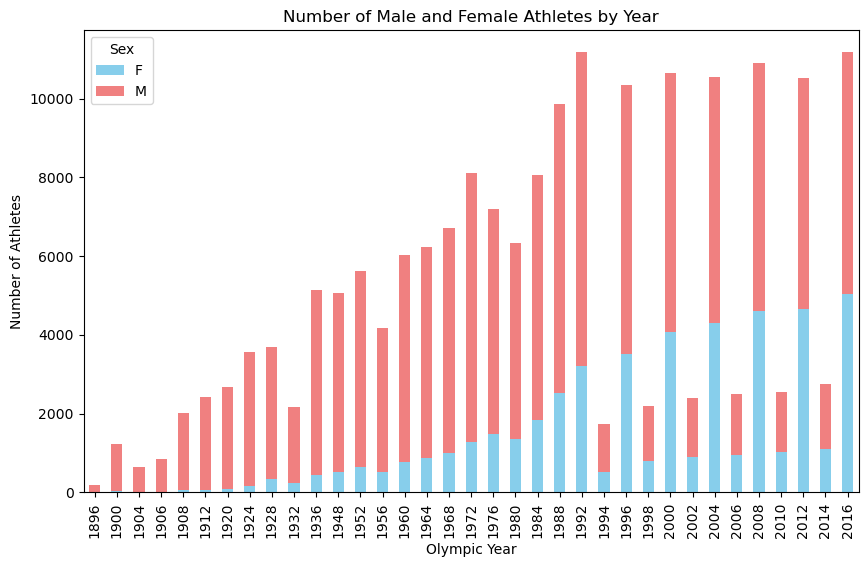

In [12]:
#ratio of number of male and female athletes by year

import matplotlib.pyplot as plt

query = """
SELECT Year, Sex, COUNT(DISTINCT ID) AS Athlete_Count
FROM df_athlete
GROUP BY Year, Sex
ORDER BY Year, Sex
"""
result = pysql(query)

pivot_df_athlete = result.pivot(index='Year', columns='Sex', values='Athlete_Count').fillna(0)
pivot_df_athlete.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Number of Male and Female Athletes by Year')
plt.xlabel('Olympic Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sex')
plt.show()

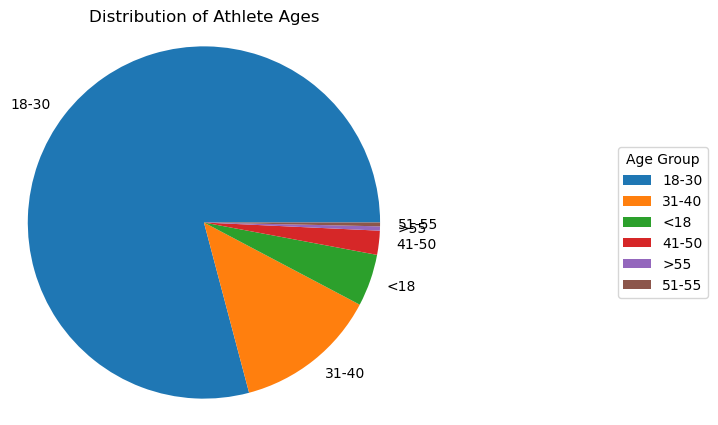

In [13]:
#age distribution of athletes

query = """
SELECT 
    CASE
        WHEN Age < 18 THEN '<18'
        WHEN Age BETWEEN 18 AND 30 THEN '18-30'
        WHEN Age BETWEEN 31 AND 40 THEN '31-40'
        WHEN Age BETWEEN 41 AND 50 THEN '41-50'
        WHEN Age BETWEEN 51 AND 55 THEN '51-55'
        WHEN Age > 55 THEN '>55'
        ELSE 'Unknown'
    END AS Age_Group,
    COUNT(*) AS Count
FROM df_athlete
WHERE Age IS NOT NULL
GROUP BY Age_Group
ORDER BY Count DESC
"""

# Run the query
age_distribution = pysql(query)

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(age_distribution['Count'], labels=age_distribution['Age_Group'])
plt.title('Distribution of Athlete Ages')
plt.axis('equal')
plt.legend(age_distribution['Age_Group'], title='Age Group', loc='center left', bbox_to_anchor=(1.55, 0.5))
plt.show()


In [14]:
#Age in each sport max and min

query = """
SELECT Sport,
       ROUND(AVG(Age), 1) AS Avg_Age,
       MIN(Age) AS Min_Age,
       MAX(Age) AS Max_Age,
       COUNT(*) AS Medalists_Count
FROM df_athlete
WHERE Medal IS NOT NULL AND Age IS NOT NULL
GROUP BY Sport
ORDER BY Medalists_Count DESC
"""

age_medal_by_sport = pysql(query)
print(age_medal_by_sport)

            Sport  Avg_Age  Min_Age  Max_Age  Medalists_Count
0       Athletics     25.0     15.0     48.0             3945
1        Swimming     20.9     12.0     46.0             3027
2          Rowing     25.6     12.0     58.0             2830
3      Gymnastics     23.4     10.0     45.0             2187
4         Fencing     28.9     15.0     52.0             1720
..            ...      ...      ...      ...              ...
61   Motorboating     31.7     26.0     46.0                7
62          Roque     53.3     37.0     64.0                3
63   Jeu De Paume     29.0     19.0     39.0                3
64  Basque Pelota     26.0     26.0     26.0                2
65    Aeronautics     26.0     26.0     26.0                1

[66 rows x 5 columns]


In [15]:
#Distinct number of sports palyed

query = """
SELECT DISTINCT Sport
FROM df_athlete
"""

distinct_sports = pysql(query)
print(distinct_sports)

            Sport
0      Basketball
1            Judo
2        Football
3      Tug-Of-War
4   Speed Skating
..            ...
61   Jeu De Paume
62          Roque
63       Alpinism
64  Basque Pelota
65    Aeronautics

[66 rows x 1 columns]


In [16]:
pysql("Select Distinct noc From df_athlete")

,NOC
0,CHN
1,DEN
2,NED
3,USA
4,FIN
...,...
225,TUV
226,NFL
227,KOS
228,SSD


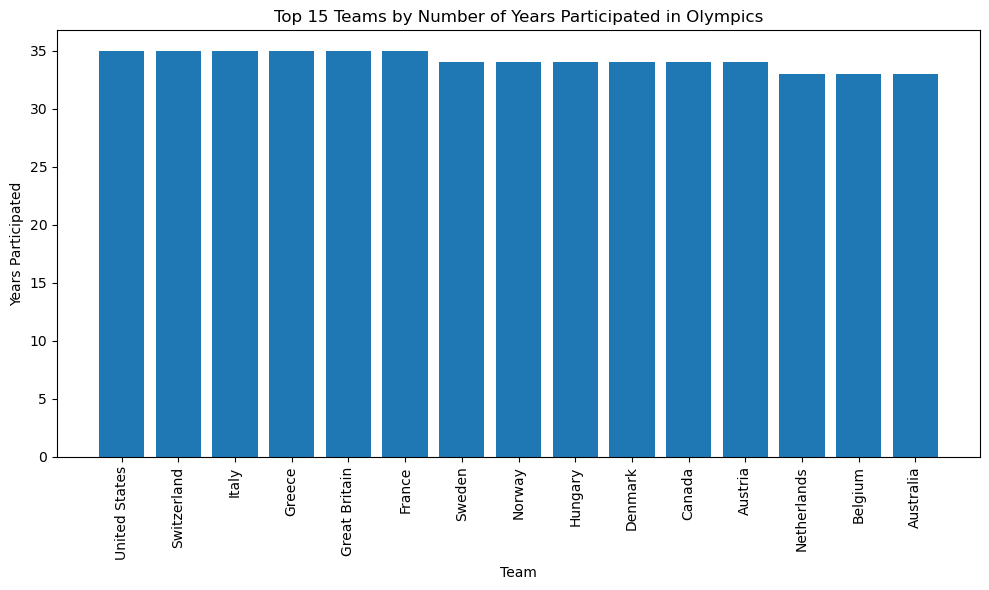

In [17]:
#Top 15 Teams by Number of Years Participated in Olympics

query = """
SELECT Team, COUNT(DISTINCT Year) AS Years_Participated
FROM df_athlete
GROUP BY Team
ORDER BY Years_Participated DESC
Limit 15
"""

top_teams = pysql(query)

plt.figure(figsize=(10, 6))
plt.bar(top_teams['Team'], top_teams['Years_Participated'])
plt.title('Top 15 Teams by Number of Years Participated in Olympics')
plt.xlabel('Team')
plt.ylabel('Years Participated')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




In [18]:
pysql("Select count(Distinct Year) From df_athlete")

,count(Distinct Year)
0,35


In [19]:
#Unique players

query = """
SELECT Name, COUNT(DISTINCT ID) as ID_Count
FROM df_athlete
GROUP BY Name
HAVING ID_Count > 1
ORDER BY ID_Count DESC
LIMIT 10
"""

pysql(query)


,Name,ID_Count
0,Zhang Li,5
1,Wolfgang Mller,5
2,Wang Nan,5
3,Lszl Szab,5
4,Li Jie,5
5,Kim Seong-Eun,5
6,Ivan Ivanov,5
7,Zhang Lei,4
8,Wang Ying,4
9,Wang Yan,4


In [20]:
#total medals in each sport over 120 years top 15 teams

query = """
SELECT count(Distinct Medal) as Total_Medal, COUNT(DISTINCT Name) AS Unique_Players, Sport
From df_athlete
Where Medal is not null
Group by Sport
ORDER BY Total_Medal DESC
LIMIT 15
"""
pysql(query)

,Total_Medal,Unique_Players,Sport
0,3,1047,Wrestling
1,3,508,Weightlifting
2,3,772,Water Polo
3,3,763,Volleyball
4,3,105,Tug-Of-War
5,3,25,Triathlon
6,3,21,Trampolining
7,3,235,Tennis
8,3,120,Taekwondo
9,3,90,Table Tennis


In [21]:
#number of male and female in every year us 

query = """
SELECT COUNT(DISTINCT Name) AS Unique_Players, Sex, Year
From df_athlete
Where Team = "United States" 
Group by Year, Sex
ORDER BY Year

"""
us_gender_year=pysql(query)

us_gender_pivot = us_gender_year.pivot(index='Year', columns='Sex', values='Unique_Players').fillna(0)


In [22]:
us_gender_pivot

Sex,F,M
Year,,
1896,0.0,14.0
1900,7.0,52.0
1904,6.0,415.0
1906,0.0,38.0
1908,0.0,122.0
1912,0.0,174.0
1920,14.0,274.0
1924,25.0,297.0
1928,47.0,239.0


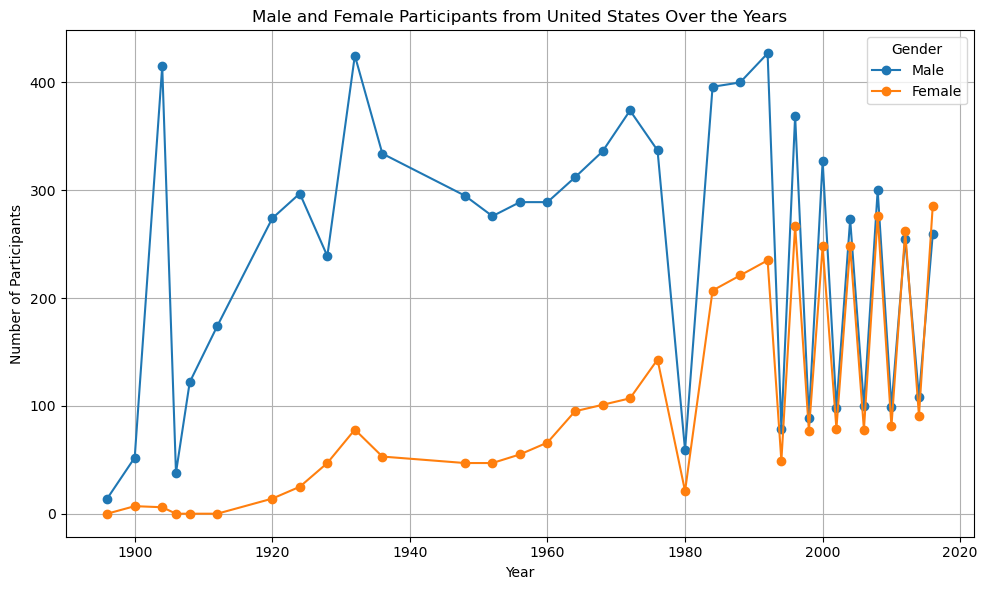

In [23]:
#Male and Female Participants from United States Over the Years

plt.figure(figsize=(10, 6))
plt.plot(us_gender_pivot.index, us_gender_pivot['M'], label='Male', marker='o')
plt.plot(us_gender_pivot.index, us_gender_pivot['F'], label='Female', marker='o')
plt.title('Male and Female Participants from United States Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
#number of participants from each team in 120 years

query = """
SELECT n.region AS Region, COUNT(DISTINCT a.Name) AS Participants
FROM df_athlete a
JOIN df_noc n
    ON a.NOC = n.NOC
GROUP BY n.region
ORDER BY Participants DESC
limit 15
"""

participants_by_region = pysql(query)


In [25]:
participants_by_region

,Region,Participants
0,USA,9652
1,Germany,7541
2,UK,6273
3,France,6161
4,Russia,5597
5,Italy,4921
6,Canada,4810
7,Japan,4036
8,Australia,3868
9,Sweden,3782


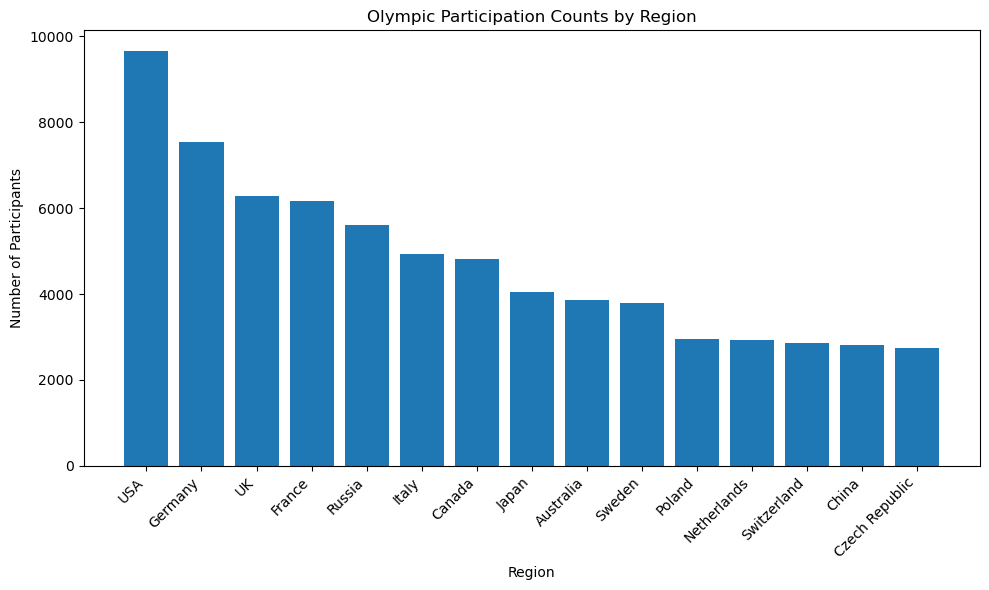

In [26]:
#PArticipation years in Olympic of top 15 teams

# Drop rows with missing region
participants_by_region = participants_by_region.dropna(subset=['Region'])

# Sort for better readability
participants_by_region = participants_by_region.sort_values(by='Participants', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(participants_by_region['Region'], participants_by_region['Participants'])
plt.title('Olympic Participation Counts by Region')
plt.xlabel('Region')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [27]:
pysql("Select count(distinct NOC) from df_noc")

,count(distinct NOC)
0,230


In [28]:
df_athlete["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [29]:
pysql("Select max(Age) from df_athlete")

,max(Age)
0,97.0


In [30]:
pysql("Select min(Age) from df_athlete")

,min(Age)
0,10.0


In [31]:
pysql("Select * From df_athlete where age = 97")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,128719,John Quincy Adams Ward,M,97.0,None,None,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",None


In [32]:
pysql("Select * From df_athlete where age = 10")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,71691,Dimitrios Loundras,M,10.0,None,None,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [33]:
query = """
SELECT COUNT(DISTINCT Name) AS Unique_Players, Sex, Year
From df_athlete
Group by Year, Sex
ORDER BY Year

"""
us_gender_year=pysql(query)

us_gender_pivot = us_gender_year.pivot(index='Year', columns='Sex', values='Unique_Players').fillna(0)


In [34]:
us_gender_pivot

Sex,F,M
Year,,
1896,0.0,176.0
1900,23.0,1197.0
1904,6.0,644.0
1906,6.0,835.0
1908,44.0,1980.0
1912,53.0,2356.0
1920,78.0,2597.0
1924,169.0,3396.0
1928,340.0,3362.0


In [35]:
#correlation bet female ratio and years 

from scipy.stats import pearsonr
import numpy as np

# Make female ratio column
us_gender_pivot['Total'] = us_gender_pivot['F'] + us_gender_pivot['M']
us_gender_pivot['Female_Ratio'] = us_gender_pivot['F'] / us_gender_pivot['Total']

# Run correlation between Year and Female Ratio
years = us_gender_pivot.index.values.astype(float)
ratios = us_gender_pivot['Female_Ratio'].values.astype(float)

corr, pval = pearsonr(years, ratios)
print("Pearson correlation (Year vs Female Ratio):", round(corr, 3))
print("p-value:", pval)


Pearson correlation (Year vs Female Ratio): 0.961
p-value: 4.8143168309142823e-20


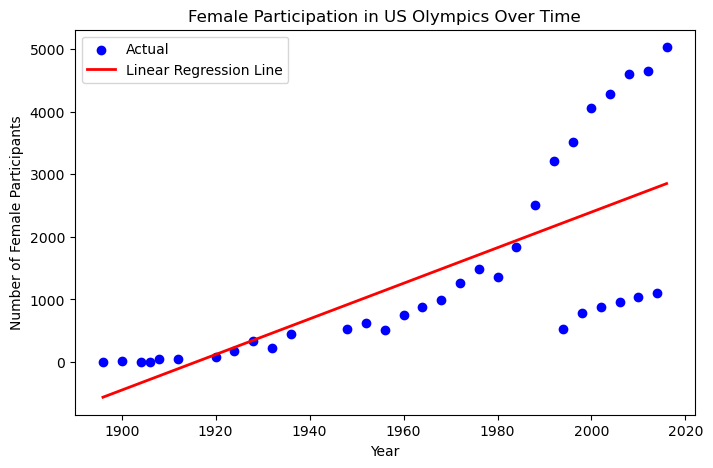

Slope: 28.448229091005707
Intercept: -54499.59776205996


In [36]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = us_gender_pivot.index.values.reshape(-1, 1)  # Years as X
y = us_gender_pivot['F'].values  # Female participants as y

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title("Female Participation in US Olympics Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Female Participants")
plt.legend()
plt.show()

# Coefficients
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)


In [37]:
future_year = np.array([[2028]])
pred_2028 = model.predict(future_year)
print("Predicted female participation in 2028:", int(pred_2028[0]))


Predicted female participation in 2028: 3193


In [38]:
#correlation between age of aprticipants and preformance 
df_athlete['Performance'] = df_athlete['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1}).fillna(0)
df_athlete['Performance']

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
271111    0.0
271112    0.0
271113    0.0
271114    0.0
271115    0.0
Name: Performance, Length: 271116, dtype: float64

In [39]:
from scipy.stats import pearsonr

valid_data = df_athlete.dropna(subset=['Age', 'Performance'])
corr, p_value = pearsonr(valid_data['Age'], valid_data['Performance'])
print("Correlation:", corr, "P-value:", p_value)


Correlation: 0.024126493815174788 P-value: 5.335730124336837e-35


In [40]:
valid_data = df_athlete.dropna(subset=['Age', 'Performance'])
valid_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Performance
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0.0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,0.0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,0.0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,0.0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,0.0


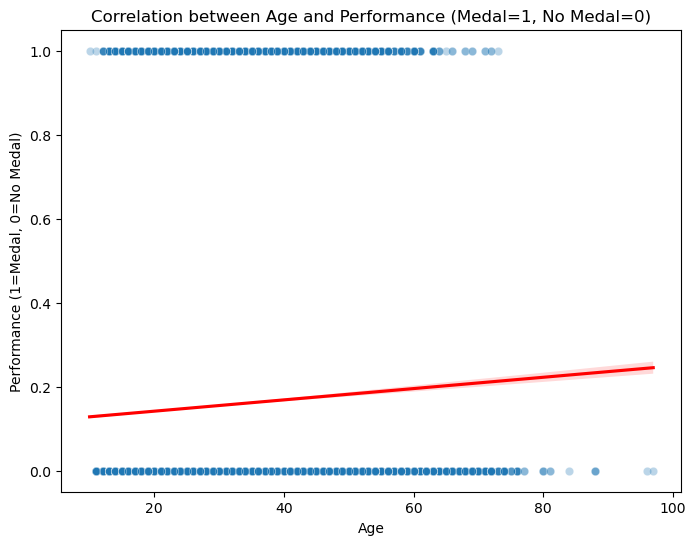

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

valid_data = df_athlete.dropna(subset=['Age', 'Performance'])

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Performance", data=valid_data, alpha=0.3)
sns.regplot(x="Age", y="Performance", data=valid_data, scatter=False, color="red")

plt.title("Correlation between Age and Performance (Medal=1, No Medal=0)")
plt.xlabel("Age")
plt.ylabel("Performance (1=Medal, 0=No Medal)")
plt.show()


In [42]:
#Textual Analysis for TF-IDF (Term Frequency-Inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

# Build a small corpus: one "document" per Sport, concatenating its event names
docs = (df_athlete.dropna(subset=['Sport','Event'])
        .groupby('Sport')['Event'].apply(lambda s: ' '.join(map(str, s))).reset_index())

vec = TfidfVectorizer(lowercase=True, stop_words='english')
X = vec.fit_transform(docs['Event'])
terms = np.array(vec.get_feature_names_out())

# Top terms per sport
topk = 8
top_terms = {}
for i, sport in enumerate(docs['Sport']):
    row = X[i].toarray().ravel()
    idx = row.argsort()[::-1][:topk]
    top_terms[sport] = terms[idx].tolist()

# Example: print a few sports and their key terms
for s in list(top_terms.keys())[:5]:
    print(s, "→", top_terms[s])


Aeronautics → ['aeronautics', 'mixed', 'york', 'dore', 'double', 'doubles', 'downhill', 'dramatic']
Alpine Skiing → ['alpine', 'skiing', 'slalom', 'giant', 'downhill', 'men', 'women', 'combined']
Alpinism → ['alpinism', 'mixed', 'york', 'dore', 'double', 'doubles', 'downhill', 'dramatic']
Archery → ['archery', 'individual', 'team', 'men', 'women', 'round', 'double', 'target']
Art Competitions → ['competitions', 'art', 'mixed', 'painting', 'unknown', 'event', 'sculpturing', 'architecture']


In [43]:
#chi aquare test - Is there an association between participants  gender and the type of sport they participate in?


from scipy.stats import chi2_contingency
query = """
Select Sport, Sex, count(Distinct Name) as pt
From df_athlete
group by Sport, Sex
"""
gender_sport = pysql(query)
contingency = gender_sport.pivot(index="Sport", columns="Sex", values="pt").fillna(0)

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Chi-Square Statistic: 16762.09968319174
p-value: 0.0


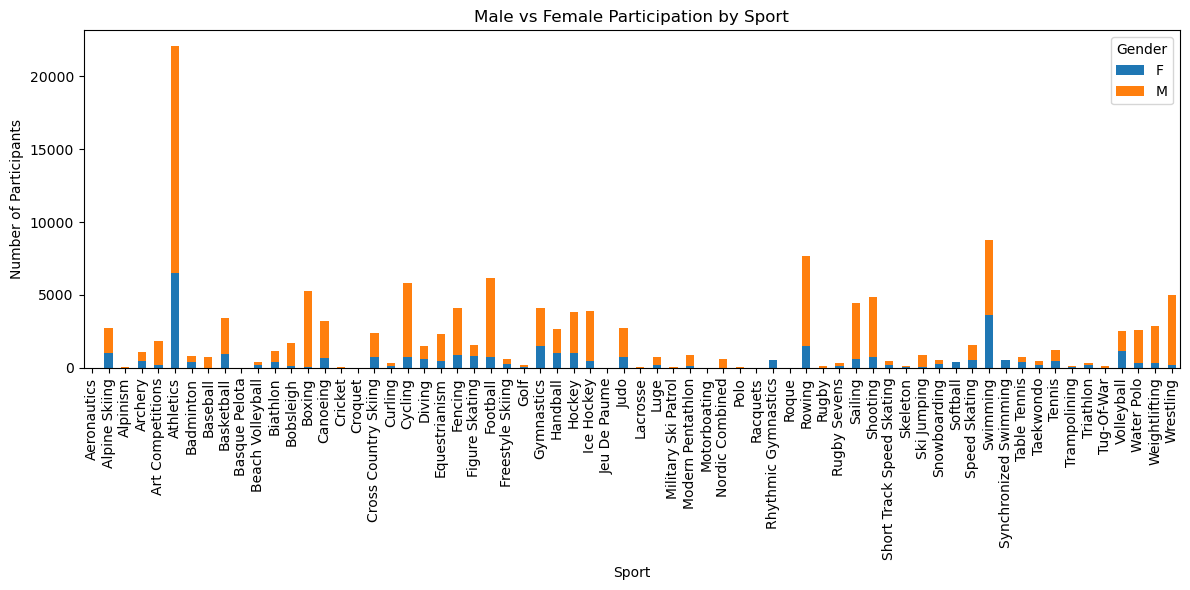

In [44]:
# First: prepare the data
query = """
SELECT Sport, Sex, COUNT(DISTINCT Name) as Participants
FROM df_athlete
GROUP BY Sport, Sex
"""
sport_gender = pysql(query)

# Pivot for plotting
pivot_sport_gender = sport_gender.pivot(index="Sport", columns="Sex", values="Participants").fillna(0)

# --- Option 1: Stacked Bar Plot ---
pivot_sport_gender.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Male vs Female Participation by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Participants")
plt.xticks(rotation=90)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [45]:
query = """
SELECT Sport, Sex, COUNT(DISTINCT Name) as Participants
FROM df_athlete
GROUP BY Sport, Sex
"""
sport_gender = pysql(query)
pivot_sport_gender = sport_gender.pivot(index="Sport", columns="Sex", values="Participants").fillna(0)
pivot_sport_gender

Sex,F,M
Sport,,
Aeronautics,0.0,1.0
Alpine Skiing,996.0,1738.0
Alpinism,1.0,24.0
Archery,500.0,613.0
Art Competitions,204.0,1610.0
...,...,...
Tug-Of-War,0.0,160.0
Volleyball,1128.0,1374.0
Water Polo,337.0,2262.0


In [46]:
pysql("Select Sex, Sport From df_athlete Where Sport = 'Tug-Of-War'")

,Sex,Sport
0,M,Tug-Of-War
1,M,Tug-Of-War
2,M,Tug-Of-War
3,M,Tug-Of-War
4,M,Tug-Of-War
...,...,...
165,M,Tug-Of-War
166,M,Tug-Of-War
167,M,Tug-Of-War
168,M,Tug-Of-War


In [47]:
query = """
SELECT Sport, Sex, COUNT(DISTINCT Name) AS Player_Count
FROM df_athlete
GROUP BY Sport, Sex
"""
gender_sport_counts = pysql(query)


In [48]:
pivot = gender_sport_counts.pivot(index='Sport', columns='Sex', values='Player_Count').fillna(0)
pivot.columns = ['Female', 'Male']  # reorder if needed


In [49]:
pivot['GSPI'] = pivot[['Male', 'Female']].min(axis=1) / pivot[['Male', 'Female']].max(axis=1)
pivot['GSPI']

Sport
Aeronautics         0.000000
Alpine Skiing       0.573072
Alpinism            0.041667
Archery             0.815661
Art Competitions    0.126708
                      ...   
Tug-Of-War          0.000000
Volleyball          0.820961
Water Polo          0.148983
Weightlifting       0.141046
Wrestling           0.046590
Name: GSPI, Length: 66, dtype: float64

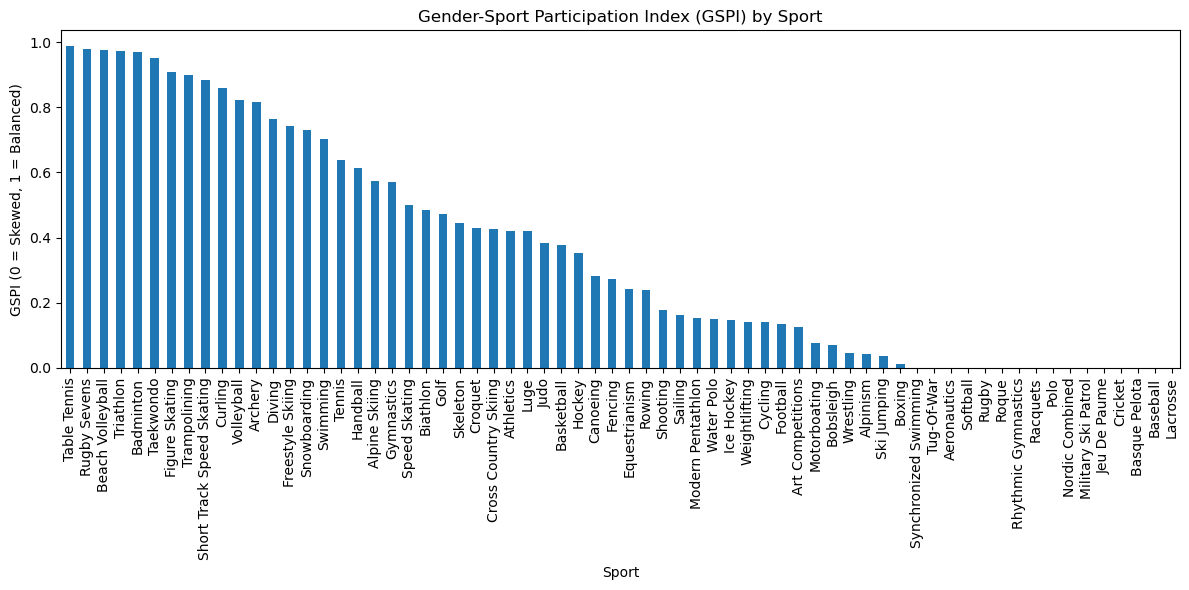

In [50]:
import matplotlib.pyplot as plt

pivot.sort_values('GSPI', ascending=False)['GSPI'].plot(kind='bar', figsize=(12,6))
plt.title("Gender-Sport Participation Index (GSPI) by Sport")
plt.ylabel("GSPI (0 = Skewed, 1 = Balanced)")
plt.xlabel("Sport")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [51]:
#Q3

from scipy.stats import f_oneway
import pandasql as psql

# Step 1: Get heights grouped by sport using pandasql
query = """
SELECT Sport, Height
FROM df_athlete
WHERE Height IS NOT NULL
"""
heights_by_sport = psql.sqldf(query, locals())

# Step 2: Prepare data for ANOVA
groups = [group["Height"].values for name, group in heights_by_sport.groupby("Sport")]

# Step 3: Run ANOVA
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 1496.6105603550416
p-value: 0.0


In [52]:
#q4

In [53]:
query = """
SELECT Team, Season, COUNT(Medal) AS Total_Medals
FROM df_athlete
WHERE Medal IS NOT NULL
GROUP BY Team, Season
"""
medals_by_season = pysql(query)


In [54]:
pivot_medals = medals_by_season.pivot(index='Team', columns='Season', values='Total_Medals').fillna(0)
pivot_medals.head()


Season,Summer,Winter
Team,,
A North American Team,4.0,0.0
Afghanistan,2.0,0.0
Algeria,17.0,0.0
Ali-Baba II,5.0,0.0
Amateur Athletic Association,5.0,0.0


In [55]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(pivot_medals['Summer'], pivot_medals['Winter'])
print("Correlation:", corr)
print("p-value:", p_value)


Correlation: 0.6933837108807119
p-value: 1.3152823243890803e-72


In [56]:
#q5

In [57]:
import pandas as pd

# Define bins and labels
bins = [0, 18, 25, 30, 35, 40, 100]
labels = ['<18', '18-25', '26-30', '31-35', '36-40', '>40']

df_athlete['Age_Group'] = pd.cut(df_athlete['Age'], bins=bins, labels=labels, right=False)


In [58]:
df_athlete['Medal_Status'] = df_athlete['Medal'].notnull().astype(int)


In [59]:
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

query = """
SELECT Age_Group, Medal_Status, COUNT(*) as Count
FROM df_athlete
WHERE Age_Group IS NOT NULL
GROUP BY Age_Group, Medal_Status
"""

contingency_data = pysql(query)
print(contingency_data)


   Age_Group  Medal_Status   Count
0      18-25             0  101866
1      18-25             1   16760
2      26-30             0   65899
3      26-30             1   13014
4      31-35             0   26786
5      31-35             1    5292
6      36-40             0    9028
7      36-40             1    1578
8        <18             0   11329
9        <18             1    1179
10       >40             0    7683
11       >40             1    1228


In [60]:
contingency_table = contingency_data.pivot(index='Age_Group', columns='Medal_Status', values='Count').fillna(0)
print(contingency_table)


Medal_Status       0      1
Age_Group                  
18-25         101866  16760
26-30          65899  13014
31-35          26786   5292
36-40           9028   1578
<18            11329   1179
>40             7683   1228


In [61]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)


Chi-Square Statistic: 581.3339904703805
p-value: 2.1808437038733266e-123
Degrees of Freedom: 5


In [62]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway

# Create Performance column (1 = Medal, 0 = No Medal)
df_athlete['Performance'] = np.where(df_athlete['Medal'].notnull(), 1, 0)

# Drop missing ages
valid_data = df_athlete.dropna(subset=['Age', 'Performance'])

# --- Pearson Correlation ---
corr, p_value = pearsonr(valid_data['Age'], valid_data['Performance'])
print("Pearson Correlation:", corr)
print("P-value:", p_value)


Pearson Correlation: 0.024126493815174788
P-value: 5.335730124336837e-35
